In [ ]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
#Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

from sklearn.metrics import mean_squared_error

# ACF/PACF Part
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Auto_Correlation
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm  # LJung-Box
# Augmented Dicky Fuller test for data stationarity (ADF test)
from statsmodels.tsa.stattools import adfuller

In [ ]:
Rating_DM = pd.read_csv('D:/Niit-std(material)/DS1/File-Project/Classification_and_Cluster_RatingData/Rating_DM.csv',index_col="Unix_Review_Time",parse_dates=True)
Rating_MI = pd.read_csv('D:/Niit-std(material)/DS1/File-Project/Classification_and_Cluster_RatingData/Rating_MI.csv',index_col="Unix_Review_Time",parse_dates=True)

In [ ]:
Rating_DM.head()

,reviewerID,asin,Rating
Unix_Review_Time,,,
2001-01-03,A2EFCYXHNK06IS,5555991584,5
2000-03-19,A1WR23ER5HMAA9,5555991584,5
2014-02-28,A2IR4Q0GPAFJKW,5555991584,4
2000-08-13,A2V0KUVAB9HSYO,5555991584,4
2001-12-07,A1J0GL9HCA7ELW,5555991584,5


In [ ]:
Rating_DM.drop(columns=['reviewerID','asin'],inplace=True)

In [ ]:
Rating_DM.head()

,Rating
Unix_Review_Time,
2001-01-03,5
2000-03-19,5
2014-02-28,4
2000-08-13,4
2001-12-07,5


In [ ]:
Rating_DM = Rating_DM.resample('M').mean()
Rating_DM.head(15)

,Rating
Unix_Review_Time,
1998-01-31,4.000000
1998-02-28,5.000000
1998-03-31,4.750000
1998-04-30,4.933333
1998-05-31,4.784314
1998-06-30,4.717391
1998-07-31,4.618375
1998-08-31,4.538813
1998-09-30,4.637255


In [ ]:
Rating_DM = Rating_DM.iloc[72:,:]

In [ ]:
Rating_DM.head()

,Rating
Unix_Review_Time,
2004-01-31,4.229037
2004-02-29,4.161129
2004-03-31,4.217805
2004-04-30,4.186770
2004-05-31,4.169130


In [ ]:
Rating_Category = Rating_DM['Rating'].copy()
Rating_Category.head(2)

Unix_Review_Time
2004-01-31    4.229037
2004-02-29    4.161129
Freq: M, Name: Rating, dtype: float64

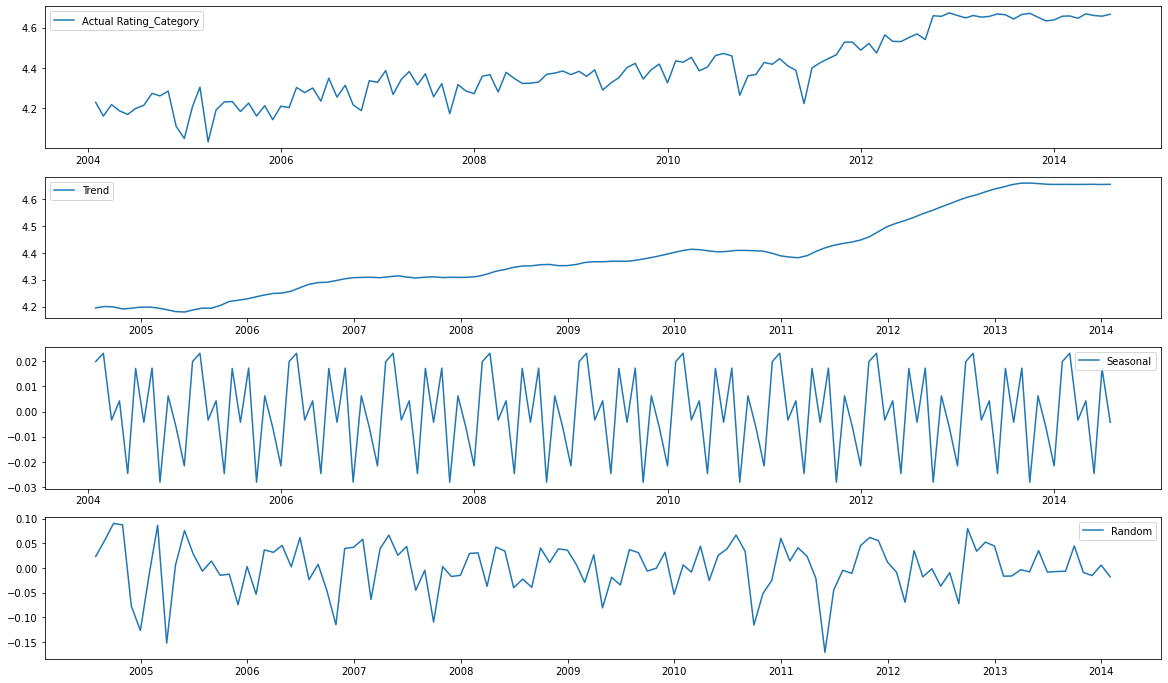

In [ ]:
decomposition = seasonal_decompose(Rating_Category, freq=12)

d_trend = decomposition.trend           #Trend/Secular
d_seasonal = decomposition.seasonal      #Seasonal
d_residuals = decomposition.resid         #irregular/random

#plotting all the 4 graphs
_,ax = plt.subplots(4,1,figsize=(20,12))

#original data
plt.subplot(411)
plt.plot(Rating_Category,label = "Actual Rating_Category")
plt.legend()

#Trend
plt.subplot(412)
plt.plot(d_trend,label = 'Trend')
plt.legend()

#Seasonality
plt.subplot(413)
plt.plot(d_seasonal,label = "Seasonal")
plt.legend()

#Random
plt.subplot(414)
plt.plot(d_residuals,label = "Random")
plt.legend()

In [ ]:
# check for stationarity (DF test)
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if pvalue < 0.05:
        msg = "pvalue={}. Data is stationary".format(pvalue)
    else:
        msg = "pvalue={}. Data is not stationary".format(pvalue)
    return msg

In [ ]:
checkStationarity(Rating_Category)

'pvalue=0.8840926719432609. Data is not stationary'

Text(0.5, 1.0, 'Partial Auto Correlation (p)')

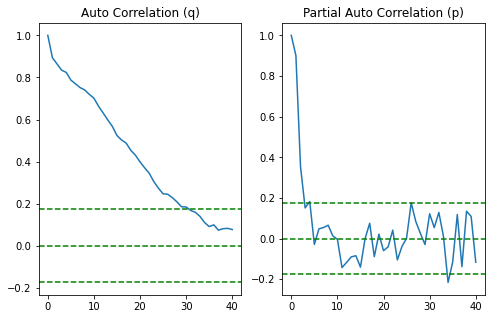

In [ ]:
#ACF and PACF
temp_acf = acf(Rating_Category, nlags=40)
temp_pacf = pacf(Rating_Category, nlags=40)

_,ax = plt.subplots(1,2,figsize=(8,5))

# plot ACF (q)
plt.subplot(121)
plt.plot(temp_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.title("Auto Correlation (q)")

# plot PACF (p)
plt.subplot(122)
plt.plot(temp_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.title("Partial Auto Correlation (p)")

In [ ]:
# split the data into train and test
ratio = 0.7
ss = int(ratio * len(Rating_Category))


train_data = Rating_Category.iloc[:ss]
test_data = Rating_Category.iloc[ss:]
print("train = {}, test = {}".format(len(train_data),len(test_data)))

train = 88, test = 39


In [ ]:
p = 0;  q=1
m1 = ARIMA(train_data,order=(p,0,q)).fit()
print(m1.summary())

                              ARMA Model Results                              
Dep. Variable:                 Rating   No. Observations:                   88
Model:                     ARMA(0, 1)   Log Likelihood                  96.576
Method:                       css-mle   S.D. of innovations              0.081
Date:                Fri, 25 Feb 2022   AIC                           -187.152
Time:                        21:54:23   BIC                           -179.720
Sample:                    01-31-2004   HQIC                          -184.158
                         - 04-30-2011                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3055      0.012    349.949      0.000       4.281       4.330
ma.L1.Rating     0.4359      0.071      6.108      0.000       0.296       0.576
                                    Roots   

In [ ]:
# predictions
# for forecast, specify the start and end range
predictions = m1.predict(0,len(test_data)-1)
predictions[0:4]

Unix_Review_Time
2004-01-31    4.305545
2004-02-29    4.277520
2004-03-31    4.256303
2004-04-30    4.288857
Freq: M, dtype: float64

<AxesSubplot:xlabel='Unix_Review_Time'>

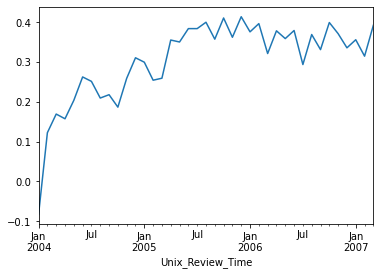

In [ ]:
actual = []
pred_dummy = pd.DataFrame({'predicted':predictions})
for i in range(len(pred_dummy.predicted)):
    actual.append(test_data[i])
pred_acal = pd.DataFrame({'actual':actual,'predicted':predictions})
pred_acal['err'] = pred_acal.actual - pred_acal.predicted
# errors
pred_acal['err'].plot()

In [ ]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1], return_df = True)['lb_pvalue'].values

if pvalue < 0.05:
    print('Reject H0. Bad model')
else:
    print("Accept H0. Good model")
    
msg = 'ARMA model. Order(p,q) = {},{}'.format(p,q)
mse1 = mean_squared_error(pred_acal.actual,pred_acal.predicted)

print(msg + "\nMSE = {} \nRMSE = {}".format(mse1,np.sqrt(mse1)))

Reject H0. Bad model
ARMA model. Order(p,q) = 0,1
MSE = 0.10261888522918766 
RMSE = 0.32034182560069746


Text(0.5, 1.0, 'ARMA model. Order(p,q) = 0,1')

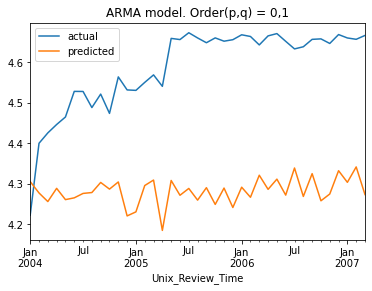

In [ ]:
pred_acal.actual.plot(legend = True)
pred_acal.predicted.plot(legend = True)
plt.title(msg)

# Musical_Instruments Categories

In [ ]:
Rating_MI.drop(columns=['reviewerID','asin'],inplace=True)

In [ ]:
Rating_MI = Rating_MI.resample('M').mean()
Rating_MI.head()

,Rating
Unix_Review_Time,
1998-04-30,5.0
1998-05-31,5.0
1998-06-30,5.0
1998-07-31,5.0
1998-08-31,4.5


In [ ]:
Rating_MI = Rating_MI.iloc[72:,:]

In [ ]:
Rating_Category = Rating_MI['Rating'].copy()
Rating_Category.head(2)

Unix_Review_Time
2004-04-30    4.083333
2004-05-31    4.212389
Freq: M, Name: Rating, dtype: float64

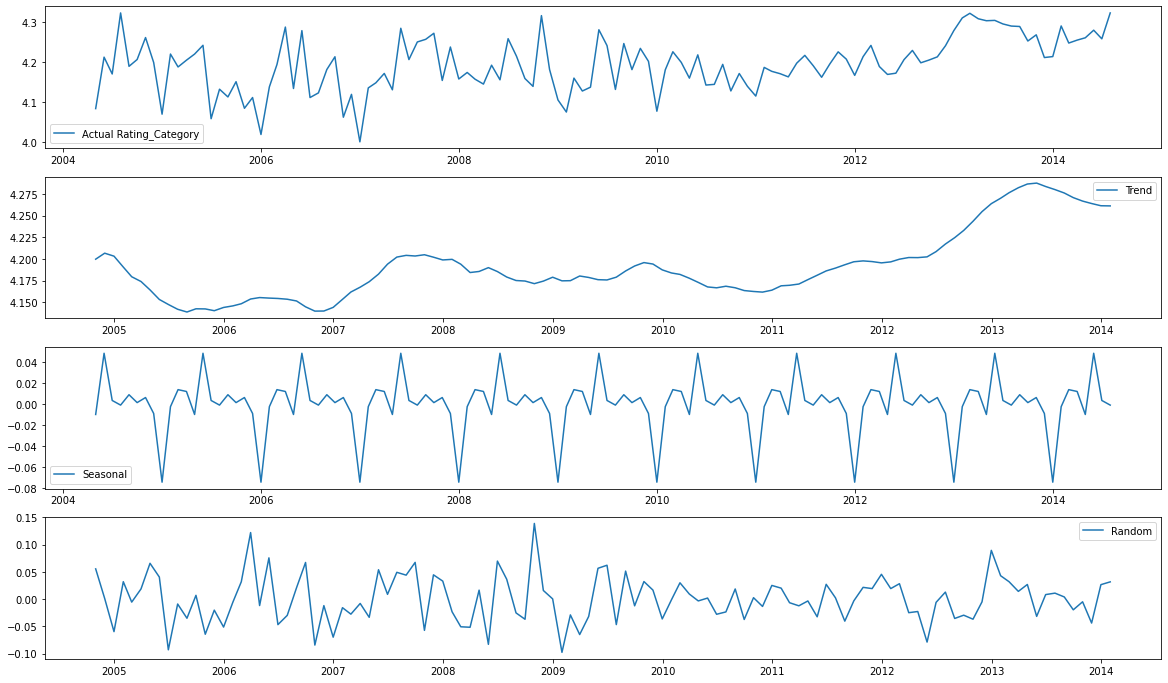

In [ ]:
decomposition = seasonal_decompose(Rating_Category, freq=12)

d_trend = decomposition.trend           #Trend/Secular
d_seasonal = decomposition.seasonal      #Seasonal
d_residuals = decomposition.resid         #irregular/random

#plotting all the 4 graphs
_,ax = plt.subplots(4,1,figsize=(20,12))

#original data
plt.subplot(411)
plt.plot(Rating_Category,label = "Actual Rating_Category")
plt.legend()

#Trend
plt.subplot(412)
plt.plot(d_trend,label = 'Trend')
plt.legend()

#Seasonality
plt.subplot(413)
plt.plot(d_seasonal,label = "Seasonal")
plt.legend()

#Random
plt.subplot(414)
plt.plot(d_residuals,label = "Random")
plt.legend()

In [ ]:
checkStationarity(Rating_Category)

'pvalue=0.8711394842189047. Data is not stationary'

Text(0.5, 1.0, 'Partial Auto Correlation (p)')

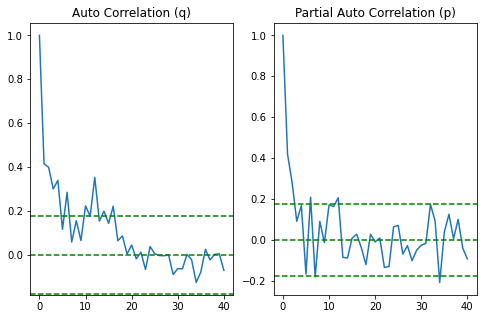

In [ ]:
#ACF and PACF
temp_acf = acf(Rating_Category, nlags=40)
temp_pacf = pacf(Rating_Category, nlags=40)

_,ax = plt.subplots(1,2,figsize=(8,5))

# plot ACF (q)
plt.subplot(121)
plt.plot(temp_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.title("Auto Correlation (q)")

# plot PACF (p)
plt.subplot(122)
plt.plot(temp_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.title("Partial Auto Correlation (p)")

In [ ]:
#!pip install pmdarima

In [ ]:
#from pmdarima.arima import auto_arima
#m1 = auto_arima(Rating_Category, start_p = 0, max_p = 6, start_q = 0,max_q = 1,seasonal = False, trace = True)

In [ ]:
#print(m1.summary())

In [ ]:
# split the data into train and test
ratio = 0.7
ss = int(ratio * len(Rating_Category))


train_data = Rating_Category.iloc[:ss]
test_data = Rating_Category.iloc[ss:]
print("train = {}, test = {}".format(len(train_data),len(test_data)))

train = 86, test = 38


In [ ]:
p = 1;  q=1
m1 = ARIMA(train_data,order=(p,0,q)).fit()
print(m1.summary())

                              ARMA Model Results                              
Dep. Variable:                 Rating   No. Observations:                   86
Model:                     ARMA(1, 1)   Log Likelihood                 116.340
Method:                       css-mle   S.D. of innovations              0.063
Date:                Fri, 25 Feb 2022   AIC                           -224.680
Time:                        21:54:28   BIC                           -214.862
Sample:                    04-30-2004   HQIC                          -220.729
                         - 05-31-2011                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1732      0.009    468.125      0.000       4.156       4.191
ar.L1.Rating     0.5404      0.286      1.890      0.059      -0.020       1.101
ma.L1.Rating    -0.3888      0.305     -1.27

In [ ]:
# predictions
# for forecast, specify the start and end range
predictions = m1.predict(0,len(test_data)-1)
predictions[0:4]

Unix_Review_Time
2004-04-30    4.173183
2004-05-31    4.158458
2004-06-30    4.173504
2004-07-31    4.172856
Freq: M, dtype: float64

<AxesSubplot:xlabel='Unix_Review_Time'>

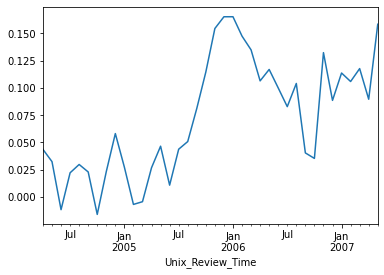

In [ ]:
actual = []
pred_dummy = pd.DataFrame({'predicted':predictions})
for i in range(len(pred_dummy.predicted)):
    actual.append(test_data[i])
pred_acal = pd.DataFrame({'actual':actual,'predicted1':predictions})
pred_acal['err'] = pred_acal.actual - pred_acal.predicted1
# errors
pred_acal['err'].plot()

In [ ]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1], return_df = True)['lb_pvalue'].values

if pvalue < 0.05:
    print('Reject H0. Bad model')
else:
    print("Accept H0. Good model")
    
msg = 'ARMA model. Order(p,q) = {},{}'.format(p,q)
mse1 = mean_squared_error(pred_acal.actual,pred_acal.predicted1)

print(msg + "\nMSE = {} \nRMSE = {}".format(mse1,np.sqrt(mse1)))

Accept H0. Good model
ARMA model. Order(p,q) = 1,1
MSE = 0.008093832695069084 
RMSE = 0.08996573067045632


Text(0.5, 1.0, 'ARMA model. Order(p,q) = 1,1')

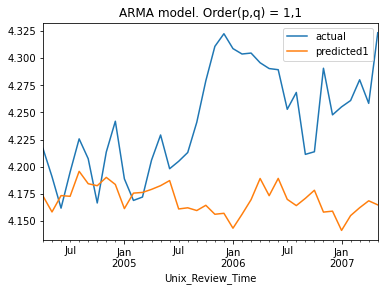

In [ ]:
pred_acal.actual.plot(legend = True)
pred_acal.predicted1.plot(legend = True)
plt.title(msg)

##Average Rating Forecast of Digital Music and Musical Instruments using ARMA Model

In [ ]:
d=0; p1 = 1;  q=1; p = 0
# build model and forecast on unseen data (without Y)
m1 = ARIMA(Rating_DM['Rating'],order=(p1,d,q)).fit()
m2 = ARIMA(Rating_MI['Rating'],order=(p,d,q)).fit()
predictions = m1.predict(len(Rating_DM),len(Rating_DM)+11).rename('predictions')
predictions1 = m2.predict(len(Rating_MI),len(Rating_MI)+11).rename('predictions1')

Text(0.5, 1.0, 'Average Rating Forecast of Digital Music and Musical Instruments')

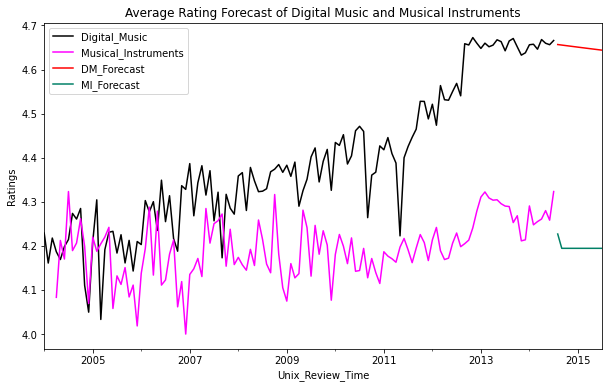

In [ ]:
Rating_DM['Rating'].plot(figsize=(10,6),legend=True,label='Digital_Music',colormap='copper')
Rating_MI['Rating'].plot(figsize=(10,6),legend=True,label='Musical_Instruments',colormap='spring')
plt.ylabel('Ratings')
predictions.plot(legend=True,label='DM_Forecast',colormap='autumn')
predictions1.plot(legend=True,label='MI_Forecast',colormap='summer')
plt.title('Average Rating Forecast of Digital Music and Musical Instruments')

## ARMA Model for both the Categories

In [ ]:
Rating_Time = pd.read_csv('Rating_DM_MI.csv',index_col="Unix_Review_Time",parse_dates=True)

In [ ]:
Rating_Time.drop(columns=['Reviewer_ID','asin'],inplace=True)

In [ ]:
Rating_Time = Rating_Time.resample('M').mean()
Rating_Time.head()

,Rating
Unix_Review_Time,
1998-01-31,4.000000
1998-02-28,5.000000
1998-03-31,4.750000
1998-04-30,4.937500
1998-05-31,4.786408


In [ ]:
Rating_Category = Rating_Time['Rating'].copy()
Rating_Category.head(2)

Unix_Review_Time
1998-01-31    4.0
1998-02-28    5.0
Freq: M, Name: Rating, dtype: float64

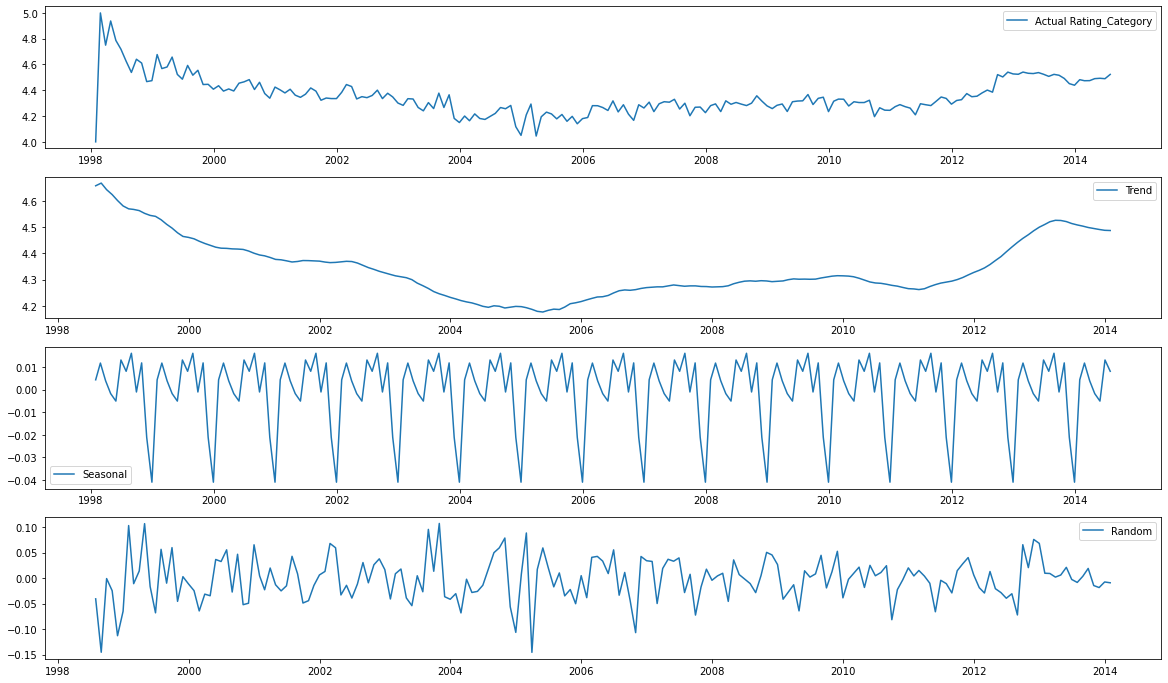

In [ ]:
decomposition = seasonal_decompose(Rating_Category, freq=12)

d_trend = decomposition.trend           #Trend/Secular
d_seasonal = decomposition.seasonal      #Seasonal
d_residuals = decomposition.resid         #irregular/random

#plotting all the 4 graphs
_,ax = plt.subplots(4,1,figsize=(20,12))

#original data
plt.subplot(411)
plt.plot(Rating_Category,label = "Actual Rating_Category")
plt.legend()

#Trend
plt.subplot(412)
plt.plot(d_trend,label = 'Trend')
plt.legend()

#Seasonality
plt.subplot(413)
plt.plot(d_seasonal,label = "Seasonal")
plt.legend()

#Random
plt.subplot(414)
plt.plot(d_residuals,label = "Random")
plt.legend()

In [ ]:
# check for stationarity (DF test)
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if pvalue < 0.05:
        msg = "pvalue={}. Data is stationary".format(pvalue)
    else:
        msg = "pvalue={}. Data is not stationary".format(pvalue)
    return msg

In [ ]:
checkStationarity(Rating_Category)

'pvalue=0.0022651250363617094. Data is stationary'

In [ ]:
#ACF and PACF
temp_acf = acf(Rating_Category, nlags=40)
temp_pacf = pacf(Rating_Category, nlags=40)

Text(0.5, 1.0, 'Partial Auto Correlation (p)')

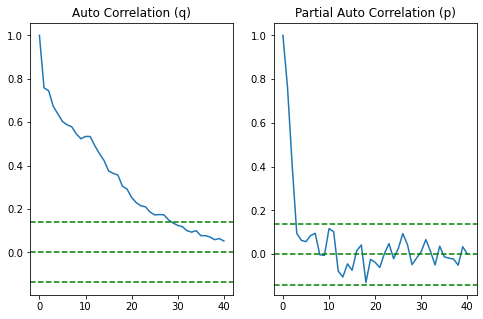

In [ ]:
_,ax = plt.subplots(1,2,figsize=(8,5))

# plot ACF (q)
plt.subplot(121)
plt.plot(temp_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.title("Auto Correlation (q)")

# plot PACF (p)
plt.subplot(122)
plt.plot(temp_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(Rating_Category)),linestyle='--',color='green')
plt.title("Partial Auto Correlation (p)")

In [ ]:
# split the data into train and test
ratio = 0.7
ss = int(ratio * len(Rating_Category))


train_data = Rating_Category.iloc[:ss]
test_data = Rating_Category.iloc[ss:]
print("train = {}, test = {}".format(len(train_data),len(test_data)))

train = 139, test = 60


In [ ]:
p = 0;  q=1

In [ ]:
m1 = ARIMA(train_data,order=(p,0,q)).fit()

In [ ]:
print(m1.summary())

                              ARMA Model Results                              
Dep. Variable:                 Rating   No. Observations:                  139
Model:                     ARMA(0, 1)   Log Likelihood                  90.382
Method:                       css-mle   S.D. of innovations              0.126
Date:                Sun, 20 Feb 2022   AIC                           -174.763
Time:                        22:10:20   BIC                           -165.960
Sample:                    01-31-1998   HQIC                          -171.186
                         - 07-31-2009                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3406      0.017    259.203      0.000       4.308       4.373
ma.L1.Rating     0.5690      0.067      8.436      0.000       0.437       0.701
                                    Roots   

In [ ]:
# predictions
# for forecast, specify the start and end range
predictions = m1.predict(0,len(test_data)-1)

In [ ]:
predictions[0:4]

Unix_Review_Time
1998-01-31    4.340562
1998-02-28    4.194177
1998-03-31    4.765427
1998-04-30    4.331988
Freq: M, dtype: float64

In [ ]:
actual = []
pred_dummy = pd.DataFrame({'predicted':predictions})
for i in range(len(pred_dummy.predicted)):
    actual.append(test_data[i])
pred_acal = pd.DataFrame({'actual':actual,'predicted':predictions})
pred_acal['err'] = pred_acal.actual - pred_acal.predicted

<AxesSubplot:xlabel='Unix_Review_Time'>

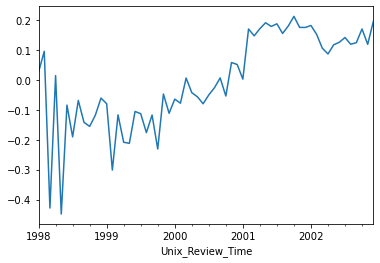

In [ ]:
# errors
pred_acal['err'].plot()

In [ ]:
# LJung-Box test
# assumption: Model residuals follow a normal distribution
# If the residuals or the errors are normally distributed, then 'Good Model'

pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1], return_df = True)['lb_pvalue'].values

if pvalue < 0.05:
    print('Reject H0. Bad model')
else:
    print("Accept H0. Good model")

Accept H0. Good model


In [ ]:
msg = 'ARMA model. Order(p,q) = {},{}'.format(p,q)
mse1 = mean_squared_error(pred_acal.actual,pred_acal.predicted)

print(msg + "\nMSE = {} \nRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA model. Order(p,q) = 0,1
MSE = 0.024229523751382685 
RMSE = 0.15565835586753024


Text(0.5, 1.0, 'ARMA model. Order(p,q) = 0,1')

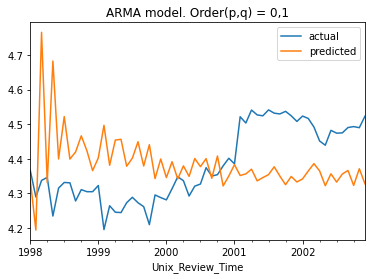

In [ ]:
pred_acal.actual.plot(legend = True)
pred_acal.predicted.plot(legend = True)
plt.title(msg)

In [ ]:
d=0
# build model and forecast on unseen data (without Y)
m1 = ARIMA(Rating_Time['Rating'],order=(p,d,q)).fit()
predictions = m1.predict(len(Rating_Time),len(Rating_Time)+11).rename('predictions')
predictions

2014-08-31    4.425271
2014-09-30    4.353726
2014-10-31    4.353726
2014-11-30    4.353726
2014-12-31    4.353726
2015-01-31    4.353726
2015-02-28    4.353726
2015-03-31    4.353726
2015-04-30    4.353726
2015-05-31    4.353726
2015-06-30    4.353726
2015-07-31    4.353726
Freq: M, Name: predictions, dtype: float64

Text(0.5, 1.0, 'ARMA model. Order(p,q) = 0,1')

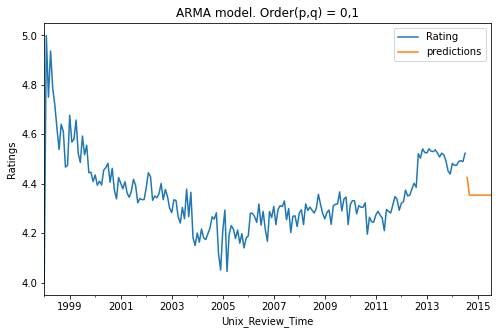

In [ ]:
Rating_Time['Rating'].plot(figsize=(8,5),legend=True)
plt.ylabel('Ratings')
predictions.plot(legend=True)
plt.title(msg)

## SARIMA Model for both the Categories

In [ ]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# DF test
from statsmodels.tsa.stattools import adfuller,acf,pacf

# difference data(another method)
from statsmodels.tsa.statespace.tools import diff

#SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# build SARIMA model with the initial values for p,d,q
p=0; d=0; q=1

#seasonal frequency value
sfv = 30
# seasonal order = (p,d,q,seasonal_frequency)
# check data/graph to identify the seasonal_frequency value

m1 = SARIMAX(train_data,order=(p,d,q),seasonal_order=(p,d,q,sfv)).fit()

In [ ]:
print(m1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Rating   No. Observations:                  139
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 30)   Log Likelihood                -252.273
Date:                            Sun, 20 Feb 2022   AIC                            510.546
Time:                                    21:17:23   BIC                            519.350
Sample:                                01-31-1998   HQIC                           514.124
                                     - 07-31-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9997      1.111      0.900      0.368      -1.177       3.177
ma.S.L30       0.9986     75.398   

In [ ]:
# forecast
start=len(train_data)
end=len(train_data)+len(test_data)-1

# parameter = "levels" indicates that the predictions are in the original format of the data (ie non-differenced data) 
predictions = m1.predict(start,end)
predictions[0:5]

2009-08-31    2.760383
2009-09-30    1.742683
2009-10-31    1.723851
2009-11-30    1.826584
2009-12-31    1.889236
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
actual = []
pred_dummy = pd.DataFrame({'predicted':predictions})
for i in range(len(pred_dummy.predicted)):
    actual.append(test_data[i])
pred_acal = pd.DataFrame({'actual':actual,'predicted':predictions})
pred_acal['err'] = pred_acal.actual - pred_acal.predicted

In [ ]:
pred_acal.head()

,actual,predicted,err
2009-08-31,4.367004,2.760383,1.606621
2009-09-30,4.289474,1.742683,2.546791
2009-10-31,4.337466,1.723851,2.613615
2009-11-30,4.346263,1.826584,2.519679
2009-12-31,4.234621,1.889236,2.345385


In [ ]:
msg = "SARIMA model. Order(p,d,q,sfv) = "+str(p)+','+str(d)+','+str(q)+","+ str(sfv)
mse1 = mean_squared_error(pred_acal.actual,pred_acal.predicted)

print(msg + "\n\tMSE = {}\n\tRMSE = {}\n\tAIC ={}\n\tBIC = {}".format(mse1,np.sqrt(mse1),m1.aic,m1.bic))

SARIMA model. Order(p,d,q,sfv) = 0,0,1,30
	MSE = 12.404436539095274
	RMSE = 3.521993262216053
	AIC =510.5461919348734
	BIC = 519.3496137342654


Text(0.5, 1.0, 'SARIMA model. Order(p,d,q,sfv) = 0,0,1,30')

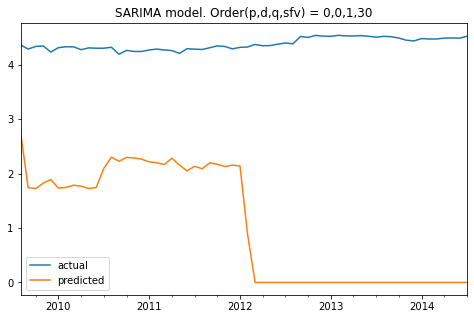

In [ ]:
# plot the actual and predicted values
pred_acal.actual.plot(figsize=(8,5),legend=True)
pred_acal.predicted.plot(legend=True)
plt.title(msg)

In [ ]:
m1 = SARIMAX(Rating_Time['Rating'],order=(p,d,q),seasonal_order=(p,d,q,sfv)).fit()
predictions = m1.predict(len(Rating_Time),len(Rating_Time)+11).rename('predictions')
predictions

2014-08-31    3.173725
2014-09-30    1.930262
2014-10-31    1.861763
2014-11-30    1.932332
2014-12-31    2.078579
2015-01-31    1.929710
2015-02-28    1.911666
2015-03-31    2.058859
2015-04-30    2.068479
2015-05-31    2.045649
2015-06-30    2.046319
2015-07-31    2.301896
Freq: M, Name: predictions, dtype: float64

Text(0.5, 1.0, 'SARIMA model. Order(p,d,q,sfv) = 0,0,1,30')

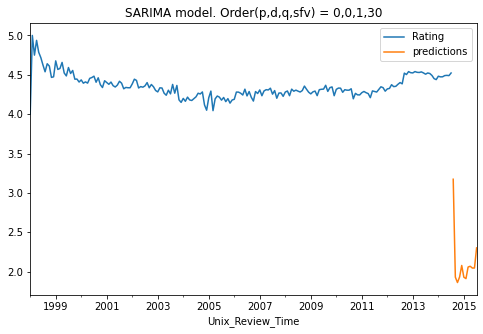

In [ ]:
Rating_Time['Rating'].plot(figsize=(8,5),legend=True)
predictions.plot(legend=True)
plt.title(msg)